In this notebook, I compare the prediction models using the KNN and SVM method to predict the final score of student base on many features of the dataset. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame,Series
import sys

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


student-mat.csv
student-merge.R
student-por.csv



In [2]:
data_mat = pd.read_csv('../input/student-mat.csv')
data_por = pd.read_csv('../input/student-por.csv')
data_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
print(type(data_mat))
data_mat=DataFrame(data_mat)
data_mat.head()[:2]

<class 'pandas.core.frame.DataFrame'>


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


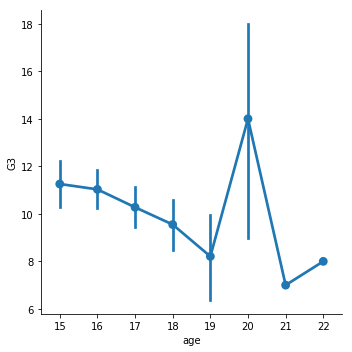

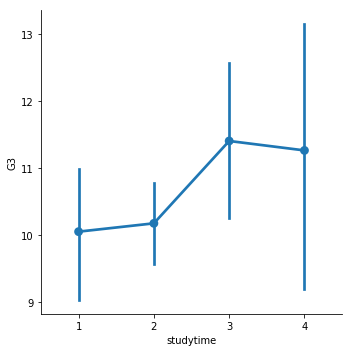

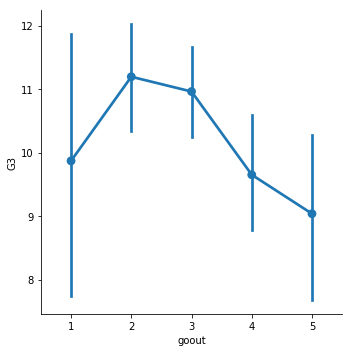

In [4]:
sns.factorplot('age','G3',data = data_mat)
sns.factorplot('studytime','G3',data = data_mat)
sns.factorplot('goout','G3',data = data_mat)

In [5]:
str_list = [] #emptyarray

for colname, colvalue in data_mat.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
num_list = data_mat.columns.difference(str_list) 
print(str_list)
print(num_list)
data_matnum = data_mat[num_list]

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Index(['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age',
       'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime',
       'traveltime'],
      dtype='object')


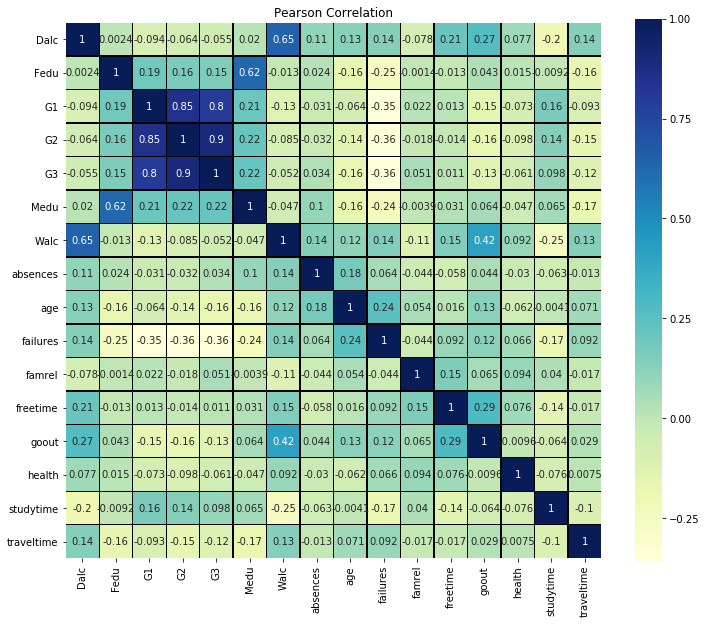

In [6]:
#subplotting
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation')
#heatmap
sns.heatmap(data_matnum.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

In [7]:
np.sum(data_mat.isnull())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
y_train = data_matnum['G3']
x_train = data_matnum
x_train .drop(['G3'], axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
number_of_samples = len(y_train)
print(len(y_train))
np.random.seed(0)
random_indices = np.random.permutation(number_of_samples)
num_training_samples = int(number_of_samples*0.75)
X_train = x_train.iloc[random_indices[:num_training_samples]]
Y_train= y_train.iloc[random_indices[:num_training_samples]]
X_test= x_train.iloc[random_indices[num_training_samples:]]
Y_test=y_train.iloc[random_indices[num_training_samples:]]
Y_Train=list(Y_train)

395


In [10]:
from sklearn import neighbors

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,Y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)

train_error_knn = np.mean(abs(y1_knn-Y_train))
print(train_error_knn)

y_test=knn.predict(X_test)
y_Predict=list(y_test)

test_error_knn = np.mean(abs(y_Predict-Y_test))
print(test_error_knn)

1.0317567567567558
1.084848484848485


In [11]:
from sklearn import svm
svm_reg=svm.SVR()
svm_reg.fit(X_train,Y_train)
y1_svm=svm_reg.predict(X_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(X_test)
y2_svm=list(y2_svm)

train_error_svm = np.mean(abs(y1_svm-Y_train))
train_error_svm_std = np.std(abs(y1_svm-Y_train))
print(train_error_svm)

test_error_svm = np.mean(abs(y2_svm-Y_test))
print(test_error_svm)

1.5364363829519134
1.974694063931135


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
train_error=[train_error_knn,train_error_svm]
test_error=[test_error_knn,test_error_svm]

col={'Train Error':train_error,'Test Error':test_error}
models=['Knn','SVM']
df=DataFrame(data=col,index=models)
df

,Train Error,Test Error
Knn,1.031757,1.084848
SVM,1.536436,1.974694


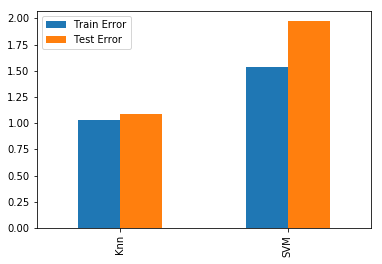

In [13]:
#plotting
df.plot(kind='bar')